# Tutorial for analyzing strongly lensed GW signals with `phazap`

In [1]:
from phazap import phazap, postprocess_phase

## Postprocessing PE results

In [2]:
?postprocess_phase

Signature:
postprocess_phase(
    pe_result,
    flow=20.0,
    fhigh=100.0,
    fbest=40.0,
    superevent_name=None,
    label=None,
    output_dir='/home/ka-lok.lo/.phazap',
    output_filename=None,
)
Docstring:
Postprocess the phase of the GW signal

Parameters
----------
pe_result: str or ParameterEstimationInput
    Path to the bilby result/PESummary file or an instance of ParameterEstimationInput
flow: float
    Lower frequency cutoff for computing :math:`\Delta \phi_f`
fhigh: float
    Upper frequency cutoff for computing :math:`\Delta \phi_f`
fbest: float
    Frequency at which the phase is best measured
superevent_name: str
    Name of the superevent
label: str
    Label for the postprocessed phase
output_dir: str
    Path to the output directory
output_filename: str
    Name of the output file

Returns
-------
PostprocessedPhase
    An instance of PostprocessedPhase class
File:      ~/projects/stronglensing/phazap/phazap/postprocess_phase.py
Type:      function

In [3]:
postprocessed_event_1 = postprocess_phase(
    "event_1_PE_samples.json",
    superevent_name="event_1",
    output_dir="./"
)

12:41 phazap INFO    : Detectors online ['H1', 'L1', 'V1']
12:41 phazap INFO    : Waveform approximant IMRPhenomXPHM
12:41 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
100%|██████████| 20000/20000 [00:40<00:00, 497.28it/s]
12:42 phazap INFO    : Assigning None as the label
12:42 phazap INFO    : Postprocessing completed and saved to ./phases_event_1_fbest_40.0_fhigh_100.0_flow_20.0.hdf5


In [4]:
postprocessed_event_2 = postprocess_phase(
    "event_2_PE_samples.hdf5",
    superevent_name="event_2",
    output_dir="./"
)

12:42 phazap INFO    : Detectors online ['H1', 'L1', 'V1']
12:42 phazap INFO    : Waveform approximant IMRPhenomXPHM
12:42 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
100%|██████████| 37783/37783 [00:50<00:00, 751.14it/s] 
12:43 phazap INFO    : Assigning None as the label
12:43 phazap INFO    : Postprocessing completed and saved to ./phases_event_2_fbest_40.0_fhigh_100.0_flow_20.0.hdf5


In [5]:
type(postprocessed_event_1)

phazap.postprocess_phase.PostprocessedPhase

## Performing the analysis

In [6]:
?phazap

Signature: phazap(event_1, event_2, plot=False, output_dir='./', output_filename=None)
Docstring:
Compute the :math:`D_J` statistic, the :math:`V_J` statistic, the phase shift, and the :math:`p`-value

Parameters
----------
event_1 : str or PostprocessedPhase
    The first event. If it is a string, it should be a file path to 
    either a postprocessed phase file or a PE result file
event_2 : str or PostprocessedPhase
    The second event. If it is a string, it should be a file path to
    either a postprocessed phase file or a PE result file
plot : bool, optional
    Whether to plot the results, by default False
output_dir : str, optional
    The output directory, by default "./"
output_filename : str, optional
    The output filename, by default None

Returns
-------
D_J : float
    The :math:`D_J` statistic
vol_J : float
    The :math:`V_J` statistic
phase_shift : float
    The phase shift
D_J_n : np.ndarray
    The :math:`D_J` statistic for each allowed phase shift
p_value : float

In [7]:
phazap(postprocessed_event_1, postprocessed_event_2)

(0.5972052069812863,
 0.00021390501494614994,
 -1.5707963267948966,
 array([ 11.63033625, 116.76706481,  11.50064831,   0.59720521]),
 0.002853245896191292)

## Visualizing the result

In [8]:
from phazap.plot_utils import phazap_plot

In [9]:
?phazap_plot

Signature:
phazap_plot(
    event1_postprocessed_phase,
    event2_postprocessed_phase,
    output_dir='./',
    output_filename=None,
)
Docstring:
Plot the postprocessed phase for two events

Parameters
----------
event1_postprocessed_phase: PostprocessedPhase
    PostprocessedPhase instance for event 1
event2_postprocessed_phase: PostprocessedPhase
    PostprocessedPhase instance for event 2
output_dir: str, optional
    Output directory
output_filename: str, optional
    Output filename

Returns
-------
matplotlib.figure.Figure
    The figure object
File:      ~/projects/stronglensing/phazap/phazap/plot_utils.py
Type:      function

In [10]:
fig = phazap_plot(
    postprocessed_event_1,
    postprocessed_event_2,
)

Removed no burn in
Removed no burn in


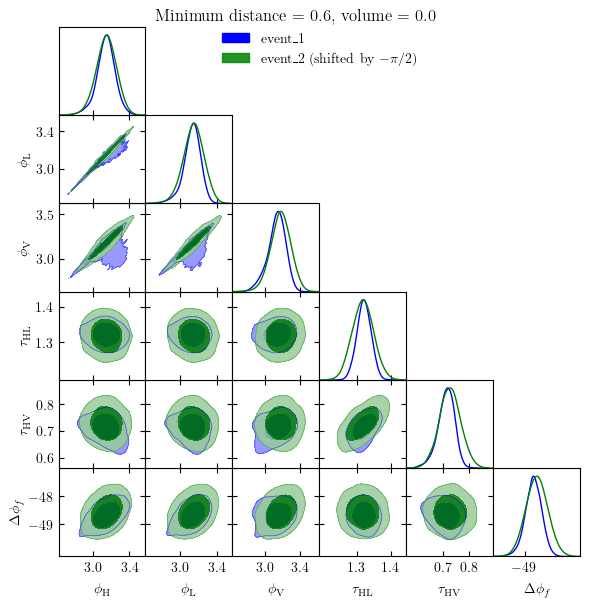

In [11]:
%matplotlib inline
fig